# OpenCV

이미지 처리에 관해 검색해보다가 유튜브에 기초 설명이 있어서 한번 실습해보려고 한다.

설명 중 필요 부분에 따라 수정 및 누락이 있으니 원본을 참고하자.

출처: https://github.com/ndb796/Python-Data-Analysis-and-Image-Processing-Tutorial

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

## 1. 기본 사용법

In [2]:
img_basic = cv2.imread('champion_image/Ahri.jpg', cv2.IMREAD_COLOR)

-  OpenCV로 이미지 파일 불러오는 함수는 `cv2.imread(filname, flag)`이며 `flag` 방식은 다음과 같다.


- `cv2.IMREAD_COLOR`: 컬러 이미지, 투명한 부분 무시


- `cv2.IMREAD_GRAYSCALE`: 그레이


- `cv2.IMREAD_UNCHANGED`: 컬러 이미지, 투명한 부분도 읽기

In [3]:
print(type(img_basic))
print(img_basic.shape)

<class 'numpy.ndarray'>
(120, 120, 3)


In [4]:
img_basic.size

43200

- 위와 같이 넘파이 형태로 불러오며 (행, 열, 색상: BGR)이라 보면 된다.


- 일반적으로 색상이 RGB인데 여기서 BGR임에 유의하자.

In [5]:
img_basic[0,0]

array([5, 0, 0], dtype=uint8)

- 첫 번째 행과 열의 BGR

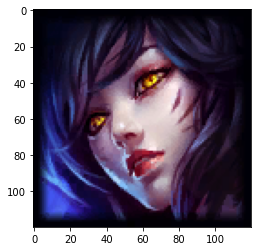

In [6]:
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

- `cv2.cvtColor()`을 이용해서 이미지 행렬의 BGR을 RGB로 바꾸었다.


- 이미지 파일은 라이엇 API에서 챔피언 이미지를 다운해서 사용하였다.

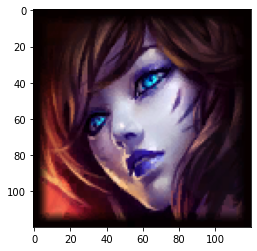

In [7]:
plt.imshow(img_basic)
plt.show()

- matplotlib은 RGB순서로 받기 때문에 위와 같이 변환작업을 하지 않으면 색상이 이상하게 나타난다.

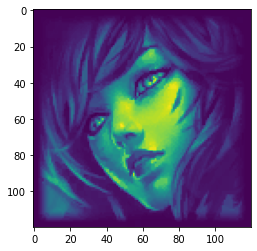

In [8]:
img_gr = cv2.cvtColor(img_basic, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gr)
plt.show()

- 그레이로도 변환 가능

In [9]:
cv2.imwrite("gray_img.png", img_gr)

True

- 변환 작업 후 `cv2.imwrite()`를 이용하여 저장 가능

## 2. 이미지 연산

### 2.1 변환

In [10]:
# 이미지 불러오기
img = cv2.imread('champion_image/Ahri.jpg', cv2.IMREAD_COLOR)

# 이미지 Numpy 객체의 특정 픽셀
px = img[100, 100]

# B, G, R 순서로 출력 (Gray Scale인 경우에는 B, G, R로 구분되지 않음)
print(px)

# R 값만 출력하기
print(px[2])

[24  9 18]
18


- numpy 행렬 인덱싱으로 특정 픽셀 확인

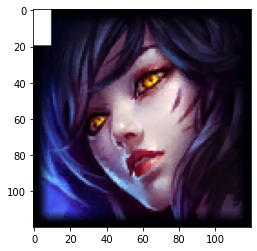

In [11]:
# 직접 픽셀마다 BGR 값 수정
for i in range(0, 20):
    for j in range(0, 10):
        img[i, j] = [255, 255, 255]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

- 이미지일뿐 행렬임은 동일하기에 numpy 성질 이용해서 픽셀마다 BGR값을 수정해서 출력 가능하다.

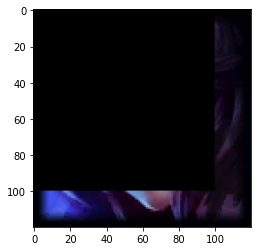

In [12]:
# 이미지 불러오기
img = cv2.imread('champion_image/Ahri.jpg', cv2.IMREAD_COLOR)

# 인덱싱으로 BGR값 수정
img[0:100, 0:100] = [0, 0, 0]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

- 슬라이싱으로 한번에 동일한 값으로 변경도 마찬가지로 numpy 성질로 가능하다.

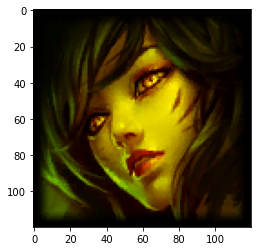

In [13]:
# 이미지 불러오기
img = cv2.imread('champion_image/Ahri.jpg', cv2.IMREAD_COLOR)

# 모든 B(0)를 0으로 (G는 1, R은 2)
img[:, :, 0] = 0

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

- 역시나 슬라이싱으로 B 값을 모두 0으로 변환하는 식도 가능하다.

### 2.2 자르기

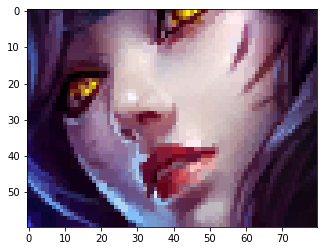

In [14]:
# 이미지 불러오기
img = cv2.imread('champion_image/Ahri.jpg', cv2.IMREAD_COLOR)

# 슬라이싱으로 이미지 자르기
roi = img[40:100, 20:100]

plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.show()

- 이미지 변환과 마찬가지로 numpy 행렬을 슬라이싱해서 특정 부분만 잘라 낼 수 있다.


- 이런 자르기를 ROI(Region Of Interest)

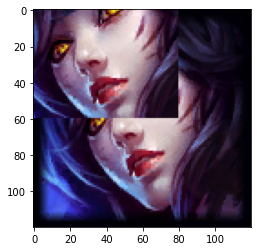

In [15]:
# ROI 단위로 이미지 복사하기
img[0:60, 0:80] = roi

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

- 앞서 자른 이미지로 BGR값을 변경해서 나타냈을 때의 모습이다.

## 3. 이미지 변형

### 3.1 크기 변형

작은 이미지를 확대한다고 했을 때 기존에 없던 픽셀 값을 생성해야 한다(반대의 경우도 고려).

이처럼 사이즈가 변할 때 픽셀 사이의 값을 조정하는 것을 Interpolation(보간법)이라 하며 여러 방법이 존재한다.

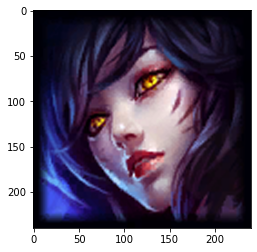

In [16]:
# 이미지 불러오기
img = cv2.imread('champion_image/Ahri.jpg', cv2.IMREAD_COLOR)

# 이미지 크기 변형 (가로/세로 2배)
expand = cv2.resize(img, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(expand, cv2.COLOR_BGR2RGB))
plt.show()

- `cv2.resize(file, dsize, fx, fy, interpolation)`로 크기 변형이 가능하다.


- dsize: 매뉴얼 사이즈, fx: 가로 비율, fy: 세로 비율


- 보통 사이즈를 확대 할 때 `cv2.INTER_CUBIC`을 주로 사용한다고 한다.


- 축의 스케일이 이전보다 커진 것이 보인다.

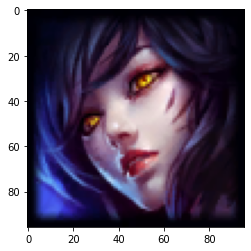

In [17]:
# 이미지 크기 변형 (가로/세로 80%)
shrink = cv2.resize(img, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(shrink, cv2.COLOR_BGR2RGB))
plt.show()

- 사이즈를 축소 할 때 `cv2.INTER_AREA`를 주로 사용한다고 한다.


- 기존 축의 범위보다 작아진 것이 보인다.

### 3.2 위치 변경

우선 OpenCV에서 위치 변경은 `cv2.warpAffine(file, M, dsize)`로 실행한다.

여기서 M은 변환 행렬, dsize는 기존 이미지 크기를? 의미한다.

원래는 이에 대해 더 깊은 이해가 필요하다고 하지만 여기서는 가장 간단한 경우만 진행해보자.

변환 행렬에 대해 간단히 설명하면 다음과 같이 정의 된다.

$$
M = 
\begin{bmatrix}
M_{11}  & M_{12} & M_{13} \\
M_{21}  & M_{22} & M_{23} \\
\end{bmatrix}
$$

이 변환 행렬을 통해 이미지의 모든 좌표 (a,b)는 다음과 같이 이동된다.

$$
(M_{11} \cdot a + M_{12} \cdot b + M_{13}, M_{21} \cdot a + M_{22} \cdot b + M_{23})
$$

(아마 좌표 (a,b)는 2x1 벡터이므로 3x1이 되게끔 (a,b,1)로 진행 하는 것 같다.)

이제 다음과 같은 변환 행렬을 보자.

$$
M = 
\begin{bmatrix}
1  & 0 & t_{x} \\
0  & 1 & t_{y} \\
\end{bmatrix}
$$

이 행렬을 이용하면 이미지의 모든 좌표는 다음과 같이 이동 될 것이다.

$$
(a + t_{x}, \ b + t_{y})
$$

즉, 단순한 좌표 이동이 된다.

In [18]:
# 이미지 불러오기
img = cv2.imread('champion_image/Ahri.jpg', cv2.IMREAD_COLOR)

# 행과 열 정보만 저장
height, width = img.shape[:2]
print(height, width)

120 120


- 총 행과 열의 정보를 저장

In [19]:
# 변환 행렬
M = np.float32([[1, 0, 50], [0, 1, 10]])
M

array([[ 1.,  0., 50.],
       [ 0.,  1., 10.]], dtype=float32)

- 오른쪽(열)으로 50, 아래쪽(행)으로 10만큼 이동하는 변환 행렬을 생성

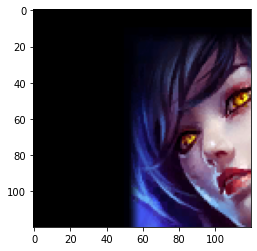

In [20]:
# 위치 변경
dst = cv2.warpAffine(img, M, (width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

- 위와 같이 이미지가 이동 된 것을 확인 가능하다.

### 3.3 회전

회전 역시 `cv2.warpAffine(file, M, dsize)`로 실행한다.

대신 여기서 변환 행렬에 삼각 함수를 이용하여 좌표 이동 하는 것이고 맥락은 동일하다.

변환 행렬은 다음과 같다.

$$
M = 
\begin{bmatrix}
\alpha  & \beta & (1-\alpha) \cdot center.x - \beta \cdot center.y  \\
- \beta  & \alpha & \beta \cdot center.x + (1- \alpha) \cdot center.y \\
\end{bmatrix}
$$

여기서, $\alpha = scale \cdot \cos \theta$, $\beta = scale \cdot \sin \theta$

이런 변환 행렬을 쉽게 만드는 함수가 `cv2.getRotationMatrix2D(center, angle, scale)`이다.

center는 중심이 되는 좌표(회전 중심), angle은 회전 각도, scale은 크기이다.

In [21]:
# 이미지 불러오기
img = cv2.imread('champion_image/Ahri.jpg', cv2.IMREAD_COLOR)

# 행과 열 정보만 저장
height, width = img.shape[:2]
print(height, width)

120 120


In [22]:
# 변환 행렬 (회전)
M = cv2.getRotationMatrix2D((width / 2, height / 2), 90, 0.5)
M

array([[ 3.061617e-17,  5.000000e-01,  3.000000e+01],
       [-5.000000e-01,  3.061617e-17,  9.000000e+01]])

- 회전 중심은 너비와 높이의 중간으로 정중앙으로 설정


- 회전 방향은 90도 (반시계)


- 스케일로 0.5 크기로 설정

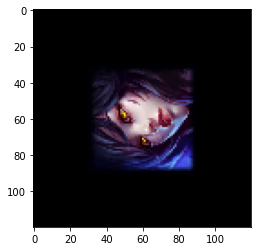

In [23]:
# 회전
dst = cv2.warpAffine(img, M, (width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

- 변환 행렬에서 설정한대로 크기가 반으로 줄은 채 반시계 방향으로 90도 이동하였다.

## 4. 이미지 합치기

`cv2.add()`: Saturation 연산을 수행

- Saturation: 0보다 작으면 0, 255보다 크면 255로 표현

`np.add()`: Modulo 연산을 수행

- Modulo: 256은 0, 257은 1로 표현

In [41]:
# 이미지 불러오기
image_1 = cv2.imread('image_1.jpg')
image_2 = cv2.imread('image_2.png')

image_1.shape, image_2.shape

((720, 1280, 3), (720, 1280, 3))

- 행, 열 크기가 같은 2개의 사진을 불러왔다.

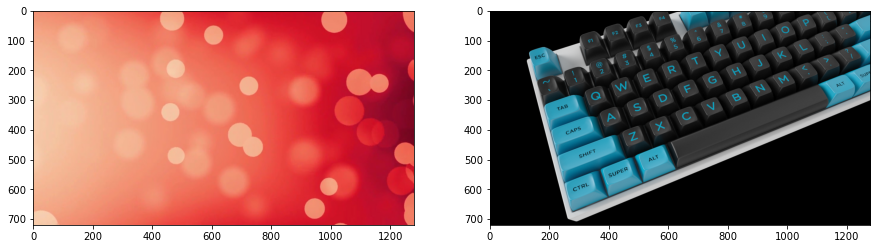

In [42]:
fig, axs = plt.subplots(1,2, figsize=(15,10))

axs[0].imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
plt.show()

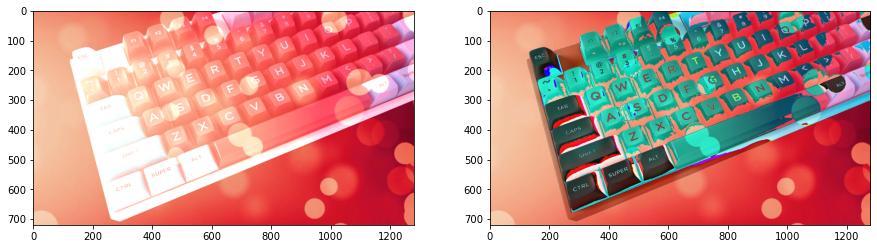

In [39]:
# cv2 합치기
result1 = cv2.add(image_1, image_2)

# numpy 더하기
result2 = image_1 + image_2

fig, axs = plt.subplots(1,2, figsize=(15,10))

axs[0].imshow(cv2.cvtColor(result1, cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))

plt.show()

- 두 가지 방법은 상황에 따라 좋은 것이 다르다고 한다.

In [60]:
# 이미지 불러오기
img = cv2.imread('champion_image/Ahri.jpg', cv2.IMREAD_COLOR)
image_1 = cv2.imread('image_1.jpg')

img.shape, image_1.shape

((120, 120, 3), (720, 1280, 3))

- 예시는 크기가 같은 경우여서 다른 크기의 이미지로 작업을 진행해보려 한다.

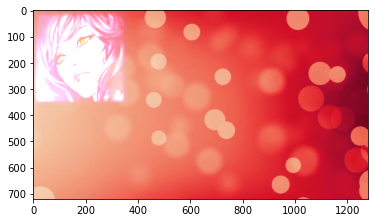

In [63]:
# 사진 확대 120 x 3 -> 360
new_img = cv2.resize(img, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)

# 이미지 합치기
sum_img = cv2.add(new_img, image_1[:360,:360])

# 이미지 변환 (자른 이미지 복사)
image_1[:360,:360] = sum_img

plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
plt.show()

- 앞서 배웠던 이미지 크기 변경, 합치기, 자른 이미지 복사 등으로 비슷하게 작업이 된다.

## 5. 임계점 처리

`cv2.threshold(image, thresh, max_value, type)`: 임계값을 기준으로 흑/백으로 분류하는 함수

- image: 처리할 Gray Scale 이미지


- thresh: 임계 값 (전체 픽셀에 적용)


- max_value: 임계 값을 넘었을 때 적용할 값


- type: 임계점을 처리하는 방식

type 방식의 예시는 다음과 같다.

- THRESH_BINARY: 임계 값보다 크면 max_value, 작으면 0


- THRESH_BINARY_INV: 임계 값보다 작으면 max_value, 크면 0


- THRESH_TRUNC: 임계 값보다 크면 임계 값, 작으면 그대로


- THRESH_TOZERO: 임계 값보다 크면 그대로, 작으면 0


- THRESH_TOZERO_INV: 임계 값보다 크면 0, 작으면 그대로

In [64]:
image = cv2.imread('gray_image.jpg', cv2.IMREAD_GRAYSCALE)

ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

In [77]:
# 이미지 불러오기 (그레이)
original = cv2.imread('gray_image.jpg', cv2.IMREAD_GRAYSCALE)

# 여러 type 실시
images = []

ret, THRESH_BINARY = cv2.threshold(original, 127, 255, cv2.THRESH_BINARY)
ret, THRESH_BINARY_INV = cv2.threshold(original, 127, 255, cv2.THRESH_BINARY_INV)
ret, THRESH_TRUNC = cv2.threshold(original, 127, 255, cv2.THRESH_TRUNC)
ret, THRESH_TOZERO = cv2.threshold(original, 127, 255, cv2.THRESH_TOZERO)
ret, THRESH_TOZERO_INV = cv2.threshold(original, 127, 255, cv2.THRESH_TOZERO_INV)

images.append(original)
images.append(THRESH_BINARY)
images.append(THRESH_BINARY_INV)
images.append(THRESH_TRUNC)
images.append(THRESH_TOZERO)
images.append(THRESH_TOZERO_INV)

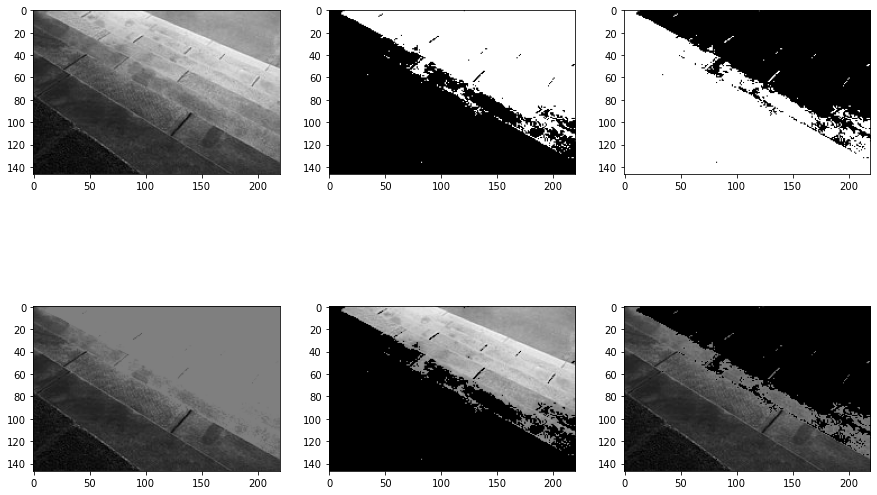

In [78]:
fig, axs = plt.subplots(2,3, figsize=(15,10))


for i, img in enumerate(images):
    row = i // 3
    col = i % 3
    axs[row, col].imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
    axs.
plt.show()